In [5]:
import numpy as np
import seaborn as sns
sns.set()

0.010044945930464861


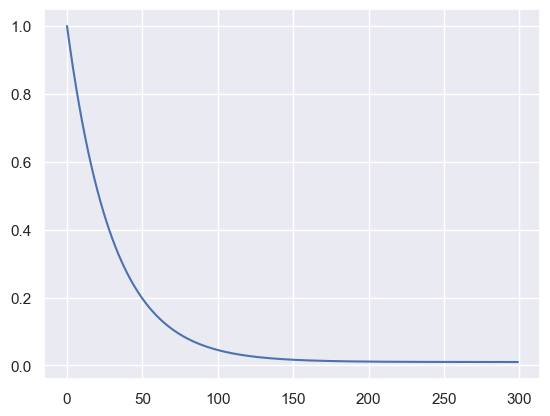

In [9]:
def _get_decay_function(start, end, decay):
    return lambda x: end + (start - end) * np.exp(-1.0 * x / decay)

epsilon_by_frame = _get_decay_function(start=1.0, end=0.01, decay=30) 

sns.lineplot([epsilon_by_frame(i) for i in range(300)])
print(epsilon_by_frame(300))

In [15]:
import math, random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd 
import torch.nn.functional as F

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [16]:

USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)


In [17]:
from collections import deque

class ReplayBuffer(object):
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        state      = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
            
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        state, action, reward, next_state, done = zip(*random.sample(self.buffer, batch_size))
        return np.concatenate(state), action, reward, np.concatenate(next_state), done
    
    def __len__(self):
        return len(self.buffer)

In [18]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v1), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v1), EnvSpec(FrozenLake-v1), EnvSpec(FrozenLake8x8-v1), EnvSpec(CliffWalking-v0), EnvSpec(Taxi-v3), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSpec(Swimmer-v3), EnvSpec(Walker2d-v2), EnvSpec(Walker2d-v3), EnvSpec(Ant-v2), EnvSpec(Ant-v3), EnvSpec(Humanoid-v2), EnvSpec(Humanoid-v3), EnvSpec(HumanoidStandup-v2), EnvSpec(FetchSlide-v1), EnvSpec(FetchPickAndPlace-v1), EnvSpec(FetchReach-v1), EnvSpec(FetchPush-v1), EnvSpec(HandReach-v0), EnvSpec(HandManipula

In [25]:
from common.wrappers import make_atari, wrap_deepmind, wrap_pytorch

env_id = "CartPole-v0"
# env    = make_atari(env_id)
# env    = wrap_deepmind(env)
# env    = wrap_pytorch(env)
env = gym.make(env_id)

In [30]:
env.action_space.n

2

In [28]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [35]:
a[0]

4

In [34]:
a = env.observation_space.shape
print(*a)

4


In [84]:
ex = torch.randn(1, 2, 32, 32)
print(ex)
print(ex.shape)



tensor([[[[ 1.1191,  0.2112, -0.1048,  ...,  1.0105, -0.7103, -1.5785],
          [ 0.8694, -0.2575,  1.3933,  ...,  0.4881, -1.0283,  1.1042],
          [-0.3421,  1.1442,  0.6347,  ..., -0.3248,  0.2371,  1.9450],
          ...,
          [-1.5839, -0.5457, -0.2978,  ...,  1.2877,  0.9677,  1.1182],
          [-0.6789, -0.6035,  0.2951,  ..., -0.3016, -1.7324, -3.1401],
          [-0.7961, -1.0044, -0.8828,  ..., -1.6548,  0.0965, -0.0096]],

         [[ 0.4143,  1.1992, -0.9954,  ...,  0.7747, -0.0854, -0.3226],
          [-1.0076,  0.7785,  0.1664,  ..., -1.9150, -1.8118, -0.0242],
          [ 1.4548,  1.6071,  0.6244,  ...,  0.6776, -0.6611, -1.0095],
          ...,
          [ 0.5560,  0.9760, -0.4098,  ..., -1.1490,  0.7380,  0.3380],
          [-1.3564, -0.2571, -0.5697,  ..., -0.6467,  0.6481, -0.1234],
          [ 0.1254,  0.9973,  0.8012,  ...,  0.0892, -0.1599,  1.5208]]]])
torch.Size([1, 2, 32, 32])


In [82]:
f1 = nn.Conv2d(2, 32, kernel_size=5, stride=2)
r1 = f1(ex)
print(r1.shape)

f2 = nn.Conv2d(32, 16, kernel_size=3, stride=1)
r2 = f2(r1)
print(r2.shape)

torch.Size([1, 32, 14, 14])
torch.Size([1, 16, 12, 12])


In [86]:
ex.shape[0]

1

In [87]:
features = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=5, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, stride=1),
            nn.ReLU(),
        )
        
features(ex).shape

torch.Size([1, 16, 12, 12])

In [90]:
12*12*16

2304

In [92]:
flat_x = features(ex).view(features(ex).size(0), -1)
flat_x.shape

torch.Size([1, 2304])

In [89]:
feature_size(features, ex)

2304

In [93]:
def feature_size(features, ex):
    return features(autograd.Variable(torch.zeros(*ex.shape))).view(1, -1).size(1)

print(feature_size(features, ex))
# print(feature_size(features, torch.rand(1, 32, 14, 14)))   

fc = nn.Sequential(
        nn.Linear(feature_size(features, ex), 256),
        # nn.Linear(feature_size(features, (1, 32, 14, 14)), 256),

        nn.ReLU(),
        nn.Linear(256, 3)
    )

fc(flat_x).shape

2304


torch.Size([1, 3])

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
import random
import numpy as np
from collections import deque

from snake_game_ai import SnakeGameAi, Direction, Point
from model_conv import Conv_QNet
from helper import plot
import torch.autograd as autograd

from torch import optim

from agent_conv import AgentConvDQN
from model_conv import Conv_QNet
from snake_game_ai import SnakeGameAi


c:\Users\Marius\anaconda3\envs\general\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.1.2 (SDL 2.0.18, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# USE_CUDA = torch.cuda.is_available()
USE_CUDA = False
Variable = (
    lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda()
    if USE_CUDA
    else autograd.Variable(*args, **kwargs)
)

In [4]:
plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0
init_replay_buffer = 2000
batch_size = 4
losses = []

game = SnakeGameAi(speed=20000, display_game=False)

# read deep double dqn paper,
# categorical most used

# use sequence of 4 frames
# number of chanels is 4
# channels, width, height
input_shape = (2, 32, 32)
output_shape = 3
model = Conv_QNet(input_shape, output_shape)
optimizer = optim.Adam(model.parameters(), lr=0.01)

agent = AgentConvDQN(model=model, optimizer=optimizer)
print("Starting loop")

TypeError: AgentConvDQN.__init__() got an unexpected keyword argument 'model'

In [8]:
# # get old state
# state = agent.get_state(game)

# # get move
# action = agent.get_action(state)

# # perform move and get new state
# reward, done, score = game.play_step(action)
# next_state = agent.get_state(game)

# # train
# if len(agent.replay_buffer) > init_replay_buffer:
#     loss = agent.compute_td_loss(batch_size)
#     losses.append(loss.item())

# # remember
# if state[0] is not None:
#     agent.replay_buffer.push(state, action, reward, next_state, done)

# if done:
#     # train long memory, plot result
#     game.reset()
#     agent.n_experiments += 1
#     agent.prev_state = None

#     if score > record:
#         record = score
#         # agent.model.save()

#     ### print some stats
#     print("Game", agent.n_experiments, "Score", score, "Record:", record)
#     print(
#         f"Epsilon: {agent.epsilon_by_frame(agent.n_experiments)}, Exploration: {agent.exploration}"
#     )

#     plot_scores.append(score)
#     total_score += score
#     mean_score = total_score / agent.n_experiments
#     plot_mean_scores.append(mean_score)

#     plot(plot_scores, plot_mean_scores)

In [6]:
import copy 

plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0

init_replay_buffer = 1000  # initial needed samples to start training
batch_size = 32
train_frequency = 4  # train again after each n new samples
target_update_frequency = (
    500  # update target network after 500 training network trainings
)

losses = []

game = SnakeGameAi(speed=20000, display_game=True)

# read deep double dqn paper,
# categorical most used

# use sequence of 2 frames
# number of chanels is 2
# channels, width, height
input_shape = (2, 32, 32)
output_shape = 3
train_model = Conv_QNet(input_shape, output_shape)
target_model = copy.deepcopy(train_model)

optimizer = optim.Adam(train_model.parameters(), lr=0.01)

agent = AgentConvDQN(
    train_model=train_model, target_model=target_model, optimizer=optimizer
)
print("Starting loop")

train_freq_counter = 1
target_update_counter = 1

Starting loop


In [10]:
# get old state
state = agent.get_state(game)

# get move
action = agent.get_action(state)

# perform move and get new state
reward, done, score = game.play_step(action)
next_state = agent.get_state(game)

# remember
if (state[0] is not None):
# if (state[0] is not None) and (done is False):
    agent.replay_buffer.push(state, action, reward, next_state, done)

# train
if len(agent.replay_buffer) > init_replay_buffer:
    # train network logic
    if train_freq_counter == train_frequency:
        loss = agent.compute_td_loss(batch_size)
        losses.append(loss.item())
        train_freq_counter = 1 # reset train counter
        target_update_counter += 1
    else:
        train_freq_counter += 1

    # target network logic
    if target_update_counter == target_update_frequency:
        agent.target_model.load_state_dict(agent.train_model.state_dict())
        target_update_counter = 1

if done:
    game.reset()
    agent.n_experiments += 1
    agent.prev_state = None

    if score > record:
        record = score
        # agent.model.save()

    ### print some stats
    print("Game", agent.n_experiments, "Score", score, "Record:", record)
    print(
        f"Epsilon: {agent.epsilon_by_frame(agent.n_experiments)}, Exploration: {agent.exploration}"
    )

    plot_scores.append(score)
    total_score += score
    mean_score = total_score / agent.n_experiments
    plot_mean_scores.append(mean_score)

    plot(plot_scores, plot_mean_scores)

In [20]:
state = agent.get_state(game)

# get move
action = agent.get_action(state)
action

[0, 1, 0]

In [21]:
state_t = torch.from_numpy(state)
state_t = torch.unsqueeze(state_t, 0)

# print("Shape of tensor: ", state.shape)
q_value = agent.target_model.forward(state_t)

In [22]:
q_value

tensor([[0.0235, 0.0472, 0.0639]], grad_fn=<AddmmBackward0>)

In [27]:
q_value.max(1)[0].data[0]
action = action.item()

AttributeError: 'list' object has no attribute 'item'

In [ ]:
q_value.max(1)[1].data[0]

In [28]:
action = q_value.max(1)[1].data[0]
action = action.item()
action

2

: 

In [80]:
batch_size = 1
state, action, reward, next_state, done = agent.replay_buffer.sample(batch_size)
state.shape

(1, 2, 32, 32)

In [81]:
state = torch.from_numpy(state)
next_state = torch.from_numpy(next_state)

action = Variable(torch.LongTensor(action))
reward = Variable(torch.FloatTensor(reward))
done = Variable(torch.FloatTensor(done))

q_values = agent.model(state)
next_q_values = agent.model(next_state)

In [82]:
q_values

tensor([[-0.0501,  0.0052, -0.0052]], grad_fn=<AddmmBackward0>)

In [83]:
q_value = q_values.gather(1, action).squeeze(1)
q_value

tensor([[-0.0501,  0.0052, -0.0501]], grad_fn=<SqueezeBackward1>)

In [84]:
next_q_value = next_q_values.max(1)[0]
next_q_value

tensor([0.0055], grad_fn=<MaxBackward0>)

In [85]:
expected_q_value = reward + agent.gamma * next_q_value * (1 - done)
expected_q_value

tensor([0.0050], grad_fn=<AddBackward0>)

In [61]:
q_value

tensor([[-0.0494, -0.0494,  0.0044],
        [-0.0474, -0.0474,  0.0045],
        [ 0.0027, -0.0500, -0.0500],
        [-0.0489,  0.0057, -0.0489]], grad_fn=<SqueezeBackward1>)

In [76]:
Variable(expected_q_value.data)

tensor([0.0041, 0.0046, 0.0039, 0.0060])

In [77]:
torch.transpose(torch.unsqueeze(Variable(expected_q_value.data), 0), 0, 1)

tensor([[0.0041],
        [0.0046],
        [0.0039],
        [0.0060]])

In [71]:
expected_q_value

tensor([0.0041, 0.0046, 0.0039, 0.0060], grad_fn=<AddBackward0>)

In [70]:
Variable(expected_q_value.data)

tensor([0.0041, 0.0046, 0.0039, 0.0060])

In [86]:
q_value - torch.transpose(torch.unsqueeze(Variable(expected_q_value.data), 0), 0, 1)

tensor([[-0.0551,  0.0002, -0.0551]], grad_fn=<SubBackward0>)

In [73]:
old_q_value

tensor([[-0.0485,  0.0068, -0.0485]], grad_fn=<SqueezeBackward1>)

In [64]:
old_exp_data

tensor([0.0063])

In [54]:
old_q_value - old_exp_data

tensor([[-0.0548,  0.0005, -0.0548]], grad_fn=<SubBackward0>)

In [41]:
Variable(expected_q_value.data).size()

torch.Size([4])

In [40]:
q_value.size()

torch.Size([4, 3])

In [87]:
loss = (q_value - torch.transpose(torch.unsqueeze(Variable(expected_q_value.data), 0), 0, 1)).pow(2).mean()
loss

tensor(0.0020, grad_fn=<MeanBackward0>)

In [10]:
state.shape

(16, 2, 32, 32)

In [19]:
type(state)

numpy.ndarray

In [20]:
type(state[0])


numpy.ndarray

In [21]:
type(state[0][0])


torch.Tensor

In [12]:
torch.from_numpy(state).shape

torch.Size([16, 2, 32, 32])

In [16]:
torch.from_numpy(next_state).shape

torch.Size([16, 2, 32, 32])

: 

In [103]:
decay=400
start=1.0
end=0.01
exp_dec = lambda x: end + (start - end) * np.exp(-1.0 * x / decay)

In [104]:
exp_dec(500)

0.29363974889158817

: 